<a href="https://colab.research.google.com/github/ciceroed/CAN/blob/main/Exerc%C3%ADcios%20-%20Cap%C3%ADtulo%205/Cap_5_Exercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Calcule as tensões nos nós tendo por referÍncia o nó 6. O circuito pode
ser equacionado da seguinte maneira:

$$ [I] = [Y] [V] $$

onde:

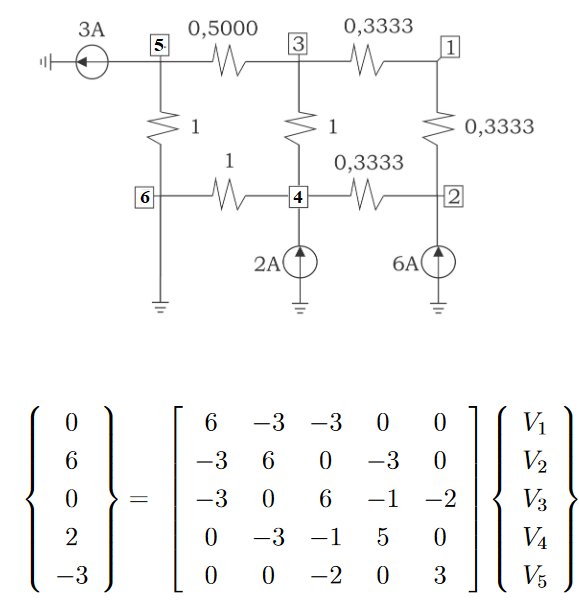

Obs: Os nós foram corrigidos para coincidirem com o sistema linear proposto.

In [4]:
# Capítulo 5: Sistemas Lineares - Exercício 2
# Métodos Iterativos: Gauss Seidel
import numpy as np

def gauss_seidel_relaxamento(A, b, x0, omega=1.0, tol=1e-6, max_iter=100):
    """
    Resolve um sistema linear Ax = b usando o método de Gauss-Seidel com fator de relaxamento.

    Args:
    A (numpy.ndarray): A matriz dos coeficientes.
    b (numpy.ndarray): O vetor de termos independentes.
    x0 (numpy.ndarray): A aproximação inicial.
    omega (float): Fator de relaxamento (default: 1.0 - sem relaxamento).
    tol (float): Tolerância para critério de parada (default: 1e-6).
    max_iter (int): Número máximo de iterações (default: 100).

    Returns:
    x (numpy.ndarray): A solução aproximada.
    num_iter (int): Número de iterações realizadas.
    """
    n = len(b)
    x = np.copy(x0)
    num_iter = 0

    for _ in range(max_iter):
        x_antigo = np.copy(x)

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])

            # Correção para evitar divisão por zero
            novo_valor = (b[i] - sum1 - sum2) / A[i, i] if A[i, i] != 0 else 0

            x[i] = x[i] + omega * (novo_valor - x[i])

        num_iter += 1

        # Cálculo do erro absoluto entre iterações
        erro_absoluto = np.linalg.norm(x - x_antigo)

        # Critério de parada baseado no erro absoluto
        if erro_absoluto < tol:
            break

    return x, num_iter

# Exemplo de uso com fator de relaxamento
A = np.array([[6, -3, -3, 0, 0],
              [-3, 6, 0, -3, 0],
              [-3, 0, 6, -1, -2],
              [0, -3, -1, 5, 0],
              [0, 0, -2, 0, 3]], dtype=float)

b = np.array([0, 6, 0, 2, -3], dtype=float)
x0 = np.zeros(len(b), dtype=float)
omega = 1.5  # Fator de relaxamento

solucao, num_iter = gauss_seidel_relaxamento(A, b, x0, omega)
print("Solução aproximada:", solucao)
print("Número de iterações:", num_iter)


Solução aproximada: [4.00000033 5.00000022 3.00000017 4.00000008 1.0000001 ]
Número de iterações: 25
